In [2]:
import os
import sys
import time
import random
import numpy as np
from PIL import Image
from numpy import genfromtxt
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

np.random.seed(1337)  # for reproducibility

Using TensorFlow backend.


In [3]:
import keras

print(keras.__version__)

2.2.4


In [4]:
def view_bar(num, total, part):
    rate = num / total
    rate_num = int(rate * 100)
    r = '\r%s:  %d%%' % (part, rate_num)
    sys.stdout.write(r)
    sys.stdout.flush()

In [5]:
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(BASE_PATH + 'test plot/' + 'acc.png')
    plt.show()

In [6]:
BASE_PATH = 'C:\\Users\\Robert\\Google 雲端硬碟\\Colab Notebooks\\how-push-you-are\\'  # change yours
PATHS     = ['mark0', 'mark1', 'mark2'] # and this
NUMBER_OF_IMG_TEST          = 9000
NUMBER_OF_IMG_TRAIN         = 54000
NUMBER_OF_CATEGORY          = 3
IMG_SIZE                    = 32
mark0 = []
mark1 = []
mark2 = []

In [7]:
# define model
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 padding='same',
                 input_shape=(IMG_SIZE, IMG_SIZE, 3), 
                 activation='relu', name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_1'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_2'))
model.add(Dropout(0.25, name='fc1'))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='valid',
                 activation='relu', name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_3'))
model.add(Dropout(0.25, name='fc2'))
model.add(Flatten())
model.add(Dense(64, activation='relu', name='fc3'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', name='fc4'))
model.add(Dense(NUMBER_OF_CATEGORY, activation='softmax', name='output'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
fc1 (Dropout)                (None, 8, 8, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
__________

In [8]:
# load ptt-beauty pictures
for path in PATHS:
    for files in os.listdir(BASE_PATH + '32by32//' + path):
        if path == 'mark0':
            mark0.append(files)
        elif path == 'mark1':
            mark1.append(files)
        elif path == 'mark2':
            mark2.append(files)
        else:
            print('error')
    print('%s done' %path)
    
random.shuffle(mark0) # Randomly shuffle the list content
random.shuffle(mark1)
random.shuffle(mark2)

mark0 done
mark1 done
mark2 done


Train Data loading:  99%
Train Data load done, cost 270.5 minutes

X_train shape:  (54000, 32, 32, 3)
Y_train shape:  (54000, 3)


Test Data loading:  99%
Train Data load done, cost 7.6 minutes

X_test shape:  (9000, 32, 32, 3)
Y_test shape:  (9000, 3)


Train on 43200 samples, validate on 10800 samples
Epoch 1/50
 - 52s - loss: 1.0993 - acc: 0.3312 - val_loss: 1.0987 - val_acc: 0.3332
Epoch 2/50
 - 52s - loss: 1.0988 - acc: 0.3309 - val_loss: 1.0986 - val_acc: 0.3354
Epoch 3/50
 - 51s - loss: 1.0987 - acc: 0.3320 - val_loss: 1.0987 - val_acc: 0.3333
Epoch 4/50
 - 52s - loss: 1.0987 - acc: 0.3304 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 5/50
 - 51s - loss: 1.0987 - acc: 0.3325 - val_loss: 1.0986 - val_acc: 0.3257
Epoch 6/50
 - 52s - loss: 1.0987 - acc: 0.3296 - val_loss: 1.0986 - val_acc: 0.3324
Epoch 7/50
 - 52s - loss: 1.0986 - acc: 0.3365 - val_loss: 1.0986 - val_acc: 0.3326
Epoch 8/50
 - 51s - loss: 1.0985 - acc: 0.3380 - val_loss: 1.0985 - val_acc: 0.3377
Epoch 9/50
 - 52s - los

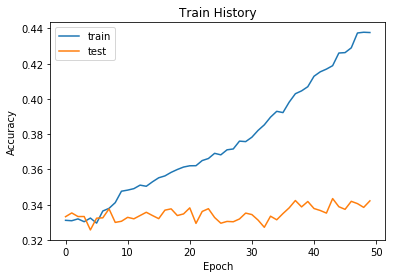

In [38]:
imgNames_mark0 = mark0[0:NUMBER_OF_IMG_TRAIN//3] # NUMBER_OF_IMG_TRAIN = 54000 
imgNames_mark1 = mark1[0:NUMBER_OF_IMG_TRAIN//3] # Take the first 54000/3 pictures for treaining.
imgNames_mark2 = mark2[0:NUMBER_OF_IMG_TRAIN//3]

del mark0[0:NUMBER_OF_IMG_TRAIN//3] # After take the first 54000/3 pictures, delete it. To avoid taking duplicates.
del mark1[0:NUMBER_OF_IMG_TRAIN//3]
del mark2[0:NUMBER_OF_IMG_TRAIN//3]

test_mark0 = mark0[0:NUMBER_OF_IMG_TEST//3] # NUMBER_OF_IMG_TEST = 9000
test_mark1 = mark1[0:NUMBER_OF_IMG_TEST//3] # Take the first 9000/3 pictures for testing.
test_mark2 = mark2[0:NUMBER_OF_IMG_TEST//3]
 
del mark0[0:NUMBER_OF_IMG_TEST] # After take the first 9000/3 pictures, delete it. To avoid taking duplicates.
del mark1[0:NUMBER_OF_IMG_TEST]
del mark2[0:NUMBER_OF_IMG_TEST]

image_list_X = np.array([])  # init
test_list_X = np.array([])


load_train_start = time.time() # load training data start time.
#------------------TRAINING DATA------------------
for count_of_load in range(NUMBER_OF_IMG_TRAIN//3):

    mark0_fileName = ''
    mark1_fileName = ''
    mark2_fileName = ''

    mark0_fileName = BASE_PATH + '32by32/mark0/' + imgNames_mark0[count_of_load]
    mark1_fileName = BASE_PATH + '32by32/mark1/' + imgNames_mark1[count_of_load]
    mark2_fileName = BASE_PATH + '32by32/mark2/' + imgNames_mark2[count_of_load]

    mark0_im = np.array([])
    mark1_im = np.array([])
    mark2_im = np.array([])

    mark0_im = np.array(Image.open(mark0_fileName), dtype=np.float)
    mark1_im = np.array(Image.open(mark1_fileName), dtype=np.float)
    mark2_im = np.array(Image.open(mark2_fileName), dtype=np.float)

    image_list_X = np.append(image_list_X, mark0_im)
    image_list_X = np.append(image_list_X, mark1_im)
    image_list_X = np.append(image_list_X, mark2_im)

    view_bar(count_of_load, NUMBER_OF_IMG_TRAIN//3, 'Train Data loading')

load_train_end = time.time()
load_train_total =(load_train_end-load_train_start)/60
print('\nTrain Data load done, cost %.1f minutes' %load_train_total)

X_train = image_list_X.reshape(int(image_list_X.shape[0]/32/32/3), 32, 32, 3).astype('float32')/255
Y_train = genfromtxt(BASE_PATH + "train_label.csv", delimiter=',').astype('int')

print('\nX_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('\n')
#----------------------------------------------


load_test_start = time.time() # load testing data start time.
#------------------TESTING DATA-------------------
for count_of_load in range(NUMBER_OF_IMG_TEST//3):

    mark0_fileName = ''
    mark1_fileName = ''
    mark2_fileName = ''

    mark0_fileName = BASE_PATH + '32by32/mark0/' + test_mark0[count_of_load]
    mark1_fileName = BASE_PATH + '32by32/mark1/' + test_mark1[count_of_load]
    mark2_fileName = BASE_PATH + '32by32/mark2/' + test_mark2[count_of_load]

    mark0_im = np.array([])
    mark1_im = np.array([])
    mark2_im = np.array([])

    mark0_im = np.array(Image.open(mark0_fileName), dtype=np.float)
    mark1_im = np.array(Image.open(mark1_fileName), dtype=np.float)
    mark2_im = np.array(Image.open(mark2_fileName), dtype=np.float)

    test_list_X = np.append(test_list_X, mark0_im)
    test_list_X = np.append(test_list_X, mark1_im)
    test_list_X = np.append(test_list_X, mark2_im)

    view_bar(count_of_load, NUMBER_OF_IMG_TEST//3, 'Test Data loading')
load_test_end = time.time()
load_test_total =(load_test_end-load_test_start)/60
print('\nTrain Data load done, cost %.1f minutes' %load_test_total)

X_test = test_list_X.reshape(int(test_list_X.shape[0]/32/32/3), 32, 32, 3).astype('float32')/255
Y_test = genfromtxt(BASE_PATH + "test_label.csv", delimiter=',').astype('int')

print('\nX_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)
print('\n')
#----------------------------------------------


#----------------model train-------------------
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=50, batch_size=300, verbose=2)
model.save(BASE_PATH + 'ptt_buaty.h5')
scores = model.evaluate(X_test, Y_test)
print('\ntest scores: %.2f' %scores[1])
show_train_history('acc', 'val_acc')